In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/onehot.csv')

df.drop('Name', axis=1, inplace=True)

df = df.sample(frac=1).reset_index(drop=True)

df.head()

,Class,sodium,extract,alcohol,water,glycerin,glycol,acid,dimethicone,fragrance,...,tomato,pyrus,tromethamine,hedera,helix,fillers,proprietary,microcapsules,https,pinterest
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.3, random_state=42)

In [6]:
X_train.shape

(770, 1672)

In [7]:
svm = SVC(kernel='linear', C=1.0, random_state=47)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

In [8]:
X_trainC, X_testC, y_trainC, y_testC= X_train, X_test, y_train, y_test

## SVM without PCA

In [9]:
accuracy_score(y_test, y_pred)

0.9606060606060606

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       167
           1       0.98      0.94      0.96       163

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



In [11]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [12]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

## SVM with PCA

In [13]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [14]:
# print the PCA components
print(pca.fit(X_train))

PCA()


In [15]:
# print the PCA transformation matrix
print(pca.components_.shape)
print(pca.components_)

(770, 1672)
[[ 2.33616720e-02  2.22787841e-02  9.37572780e-03 ...  4.71389103e-04
  -0.00000000e+00 -0.00000000e+00]
 [ 5.78820571e-02  3.44138348e-02  5.51935787e-02 ...  5.24338448e-03
   0.00000000e+00  0.00000000e+00]
 [ 1.15645577e-03  1.50413464e-02  3.62377236e-03 ... -1.36796427e-03
   0.00000000e+00  0.00000000e+00]
 ...
 [-7.01380575e-17  4.65236315e-17  3.60394617e-17 ... -5.04516673e-03
   0.00000000e+00  0.00000000e+00]
 [-1.83578815e-16 -2.49524896e-16  4.36361337e-16 ... -8.19027071e-03
  -0.00000000e+00 -0.00000000e+00]
 [ 1.49704465e-16  1.69608530e-16 -2.60915487e-16 ...  5.42065755e-03
  -0.00000000e+00 -0.00000000e+00]]


In [16]:
# print the shape of the data before and after PCA
print(X_train.shape)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape)

(770, 1672)
(770, 770)


In [17]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [18]:
svm = SVC(kernel='linear', C=1.0, random_state=47)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=47)

In [19]:
y_pred = svm.predict(X_test)

accuracy_score(y_test, y_pred)

0.9272727272727272

In [20]:
# implelemt grid search 
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# grid.best_params_

# grid.best_estimator_

grid_predictions = grid.predict(X_test)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.513 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.513 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.513 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.513 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.513 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.513 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.513 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.513 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.506 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.656 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [21]:
pca.explained_variance_ratio_

array([2.74952139e-02, 2.14538975e-02, 1.76946547e-02, 1.68253376e-02,
       1.66768980e-02, 1.52263541e-02, 1.19724498e-02, 1.07583399e-02,
       1.05724049e-02, 1.02124278e-02, 9.80350234e-03, 9.66536812e-03,
       9.52379961e-03, 8.98798833e-03, 8.36327946e-03, 8.25744453e-03,
       8.21621106e-03, 7.96514406e-03, 7.84648574e-03, 7.81528840e-03,
       7.62129607e-03, 7.57475704e-03, 7.39639211e-03, 7.36358535e-03,
       7.05807410e-03, 6.75607861e-03, 6.71918504e-03, 6.53514175e-03,
       6.48195033e-03, 6.30713753e-03, 6.21848742e-03, 6.16273441e-03,
       6.03039380e-03, 5.96690985e-03, 5.81270539e-03, 5.70750985e-03,
       5.65884651e-03, 5.58079207e-03, 5.56082053e-03, 5.49536134e-03,
       5.43294493e-03, 5.32890749e-03, 5.25105525e-03, 5.17904790e-03,
       5.04372548e-03, 4.99075132e-03, 4.92817381e-03, 4.84921229e-03,
       4.81075141e-03, 4.78264529e-03, 4.66137902e-03, 4.64901589e-03,
       4.56426509e-03, 4.52504301e-03, 4.48664751e-03, 4.36899702e-03,
      

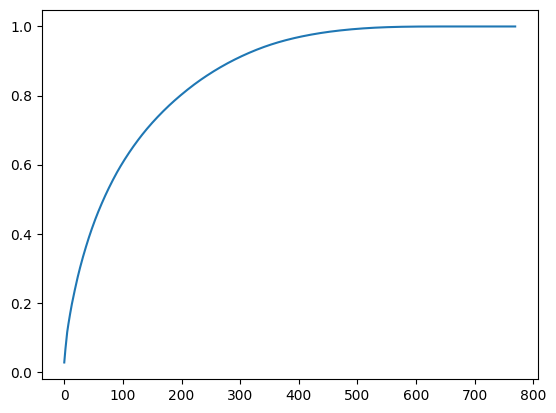

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [23]:
X_train, X_test, y_train, y_test = X_trainC, X_testC, y_trainC, y_testC

### Effect of number of components

In [24]:
# plotting for number of components vs accuracy
accuracies = []

for num_components in range(1, 1000):
    X_train, X_test, y_train, y_test = X_trainC, X_testC, y_trainC, y_testC
    pca = PCA(n_components=num_components)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    svm = SVC(kernel='linear', C=1.0, random_state=0)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


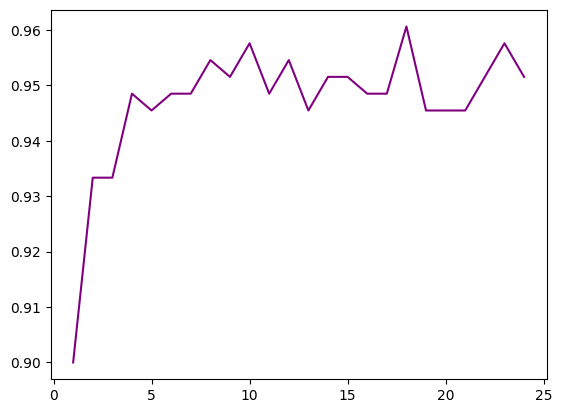

In [ ]:
# change color to purple
plt.plot(range(1, 25), accuracies, color='purple')

In [ ]:
pca.explained_variance_

array([1.48619613, 0.61427473, 0.40576596, 0.3581045 , 0.32281878,
       0.26487931, 0.23108398, 0.21506946, 0.19976505, 0.17570005,
       0.17195043, 0.1642068 , 0.1548568 , 0.15036435, 0.14968298,
       0.13828645, 0.13482655, 0.13390612, 0.12745692, 0.12669842,
       0.12207153, 0.12055291, 0.1174182 , 0.11540231])